## 2번 문제

1. num_2 폴더의 csv 파일을 데이터프레임으로 불러온다. 
2. 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol' 간의 상관관계 행렬을 구한다. 
3. 행렬 히트맵을 시각화 한다. 
4. 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol' 컬럼별 산점도 그래프를 표시한다. 
5. 국가별 술 소비량 대비 알콜 비율 컬럼을 추가하여 국가별 순위를 시각화하여 출력한다. 

In [ ]:
# pip install seaborn

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# 1. num_2 폴더의 csv 파일을 데이터프레임으로 불러온다.

drink = pd.read_csv("C:/ubion/문제 2회차/num_2/drinks.csv")

drink.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [16]:
# 2. 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol' 간의 상관관계 행렬을 구한다. 

drink_corr = drink.corr()[["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]]

drink_corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


<AxesSubplot:>

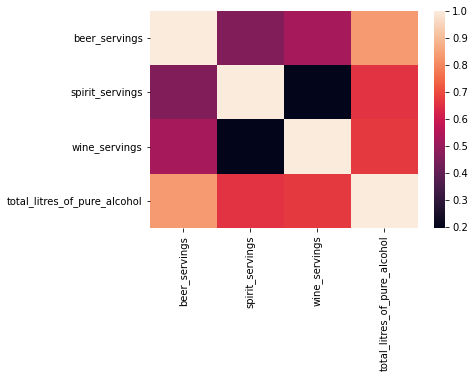

In [17]:
# 3. 행렬 히트맵을 시각화 한다. 

sns.heatmap(drink_corr)


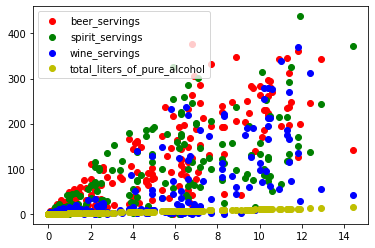

In [36]:
# 4. 'beer_servings', 'spirit_servings', 'wine_servings', 
# 'total_litres_of_pure_alcohol' 컬럼별 산점도 그래프를 표시한다. 

plt.scatter(x = drink["total_litres_of_pure_alcohol"], y = drink["beer_servings"], color='r', label="beer_servings")
plt.scatter(x = drink["total_litres_of_pure_alcohol"], y = drink["spirit_servings"], color='g', label="spirit_servings")
plt.scatter(x = drink["total_litres_of_pure_alcohol"], y = drink["wine_servings"], color='b', label="wine_servings")
plt.scatter(x = drink["total_litres_of_pure_alcohol"], y = drink["total_litres_of_pure_alcohol"], color='y', label="total_liters_of_pure_alcohol")

plt.legend()
plt.show()

In [28]:
# 5. 국가별 술 소비량 대비 알콜 비율 컬럼을 추가하여 국가별 순위를 시각화하여 출력한다. 

drink["servings_alcohol"] = (drink["beer_servings"] + drink["spirit_servings"] + drink["wine_servings"]) / drink["total_litres_of_pure_alcohol"]

drink.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,servings_alcohol
0,Afghanistan,0,0,0,0.0,AS,NaN
1,Albania,89,132,54,4.9,EU,56.122449
2,Algeria,25,0,14,0.7,AF,55.714286
3,Andorra,245,138,312,12.4,EU,56.048387
4,Angola,217,57,45,5.9,AF,54.067797


In [34]:
drink.groupby("country").max()["servings_alcohol"]

country
Afghanistan          NaN
Albania        56.122449
Algeria        55.714286
Andorra        56.048387
Angola         54.067797
                 ...    
Venezuela      56.623377
Vietnam        57.000000
Yemen          60.000000
Zambia         22.000000
Zimbabwe       18.297872
Name: servings_alcohol, Length: 193, dtype: float64

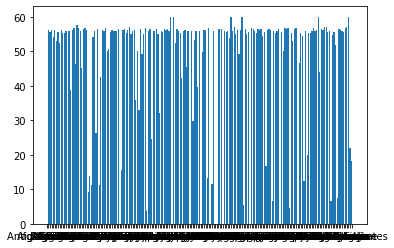

In [30]:
plt.bar(drink["country"], drink["servings_alcohol"])
plt.show()